## Analysis Plan ##
Writting a Data Scientist Blog Post using Cross-Industry Standard Process of Data Mining - (CRISP-DM)
### A. [Business Understanding](#businessunderstanding) ###
    1. Formulate research/analysis question(s)
### B. [Data Understanding](#dataunderstanding) ###
    1. Seek for relevant datasets
### C. [Data Preparation](#datapreparation) ###
    1. Data Exploration
    2. Cleaning data
    3. Features extraction and engineering
    4. Exploratory data analysis
### D. [Analysis and Modelling](analysisandmodelling) ###
    1. Answers to research/analysis question(s)
    2. Supervised learning: Predicting prices
### E. [Deployment](#deployment) ###
    1. Summary report
    2. Conclution

## A. [Business Understanding](#businessunderstanding) ##
### 1. Formulate research/analysis question(s) ###
    * Question 1:
        - Where are the Airbnb rooms in Los Angeles City?
            + Analyzing the distribution of Airbnb listing in the 3 boroughs of LAC.
    * Question 2:
        - Where is the most affordable best Airbnb rooms in Los Angeles using average price in each borough
            + Analyzing the distribution of Airbnb average prices in the 5 boroughs of LAC.
    * Question 3: 
        - What is the most popular and affordable Airbnb rooms in each Los Angeles borough
            + Finding the average prices of Airbnb rooms according to room types in each LAC borough
    * Question 4:
        - What are the major determinants of prices of rooms in Los Angeles Airbnb
            + Finding factors that positively and negatively impact the price of Airbnb rooms in LAC using linear regression analysis.

## B. [Data Understanding](#dataunderstanding) ##
### 1. Seek for relevant datasets ###
    * Our dataset comes for publicly available Airbnb and Los Angeles State Department of Health websites ### 2. Download relevant datasets
    * Download datasets from Airbnb data

### Import nessary packages

In [57]:
%%pycodestyle
import numpy as np
import pandas as pd

from datetime import datetime
from math import log
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import StackingRegressor, GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, TheilSenRegressor, LassoCV
from sklearn.linear_model import RANSACRegressor, HuberRegressor, RidgeCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

from xgboost import XGBRegressor
from eli5.sklearn import PermutationImportance

sns.set(style="ticks", color_codes=True)
plt.rc('figure', figsize=[12, 8], dpi=100)

26:1: W391 blank line at end of file


## C. [Data Preparation](#datapreparation) ##

### Gather Data
Import dataset. We get dataset from [link](http://insideairbnb.com/get-the-data/)

In [58]:
airbnb = "./Data/listings.csv"
data = pd.read_csv(airbnb)

### Explore Data ###
Firstly, We need to know the basic information of data such as the shape, the info, the columns, the dtypes.

In [59]:
data.shape

(42041, 74)

In [60]:
data.info

<bound method DataFrame.info of                        id                                      listing_url  \
0                   45392               https://www.airbnb.com/rooms/45392   
1                   45417               https://www.airbnb.com/rooms/45417   
2                    5728                https://www.airbnb.com/rooms/5728   
3                    5729                https://www.airbnb.com/rooms/5729   
4                     109                 https://www.airbnb.com/rooms/109   
...                   ...                                              ...   
42036  642191669936261915  https://www.airbnb.com/rooms/642191669936261915   
42037  642201509067710938  https://www.airbnb.com/rooms/642201509067710938   
42038  642207927530022147  https://www.airbnb.com/rooms/642207927530022147   
42039  642212869716487277  https://www.airbnb.com/rooms/642212869716487277   
42040  642217714541679400  https://www.airbnb.com/rooms/642217714541679400   

            scrape_id last_scra

In [61]:
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [62]:
data.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 74, dtype: object

In [63]:
# explore in depth each feature, and select features of interest
data.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,45392,https://www.airbnb.com/rooms/45392,20220606014052,2022-06-06,Cute Home in Mount Washington,<b>The space</b><br />Cute house in Mount Wash...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,201514,https://www.airbnb.com/users/show/201514,...,4.96,4.58,4.85,NaN,f,1,0,1,0,0.20
1,45417,https://www.airbnb.com/rooms/45417,20220606014052,2022-06-06,Silver Lake Cottage Oasis- Private Terrace- Th...,"Ideal for an extended stay, our Cottage perfec...",Walk just a couple of blocks to reach all the ...,https://a0.muscache.com/pictures/monet/Select-...,50231247,https://www.airbnb.com/users/show/50231247,...,4.98,4.91,4.82,NaN,f,4,4,0,0,1.09
2,5728,https://www.airbnb.com/rooms/5728,20220606014052,2022-06-06,Tiny Home in Artistic Oasis near Venice and LAX,Our home is located near Venice Beach without ...,Our neighborhood is very quiet and save. There...,https://a0.muscache.com/pictures/7a29d275-f293...,9171,https://www.airbnb.com/users/show/9171,...,4.92,4.80,4.70,HSR19-002149,f,3,0,3,0,2.00
3,5729,https://www.airbnb.com/rooms/5729,20220606014052,2022-06-06,Zen Room with Floating Bed near Venice and LAX,Our home is located near Venice Beach without ...,Our neighborhood is very quiet and save. There...,https://a0.muscache.com/pictures/f48e3ea8-2075...,9171,https://www.airbnb.com/users/show/9171,...,4.89,4.77,4.71,HSR19-002149,f,3,0,3,0,1.52
4,109,https://www.airbnb.com/rooms/109,20220606014052,2022-06-06,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",NaN,https://a0.muscache.com/pictures/4321499/1da98...,521,https://www.airbnb.com/users/show/521,...,4.00,5.00,4.00,NaN,f,1,1,0,0,0.02


**Then we explored selected features. There are many columns that are considered as object, yet some of they should be treated as interger or float (especially those price columns). This is a type change problem that i will handle later. For now i would like to know about the number missing values and number of unique inputs in each column.**

In [64]:
selected_features = ['id',  'host_id', 'host_since', 'host_is_superhost', 'neighbourhood_group_cleansed',
             'host_has_profile_pic', 'host_identity_verified', 'accommodates', 'number_of_reviews', 
            'latitude', 'longitude',  'room_type', 'maximum_nights','availability_30',
            'bedrooms', 'beds', 'price', 'minimum_nights', 'availability_60', 'availability_90', 'availability_365',   
            'instant_bookable']   

selected = data[selected_features]
selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42041 entries, 0 to 42040
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            42041 non-null  int64  
 1   host_id                       42041 non-null  int64  
 2   host_since                    41858 non-null  object 
 3   host_is_superhost             41858 non-null  object 
 4   neighbourhood_group_cleansed  35328 non-null  object 
 5   host_has_profile_pic          41858 non-null  object 
 6   host_identity_verified        41858 non-null  object 
 7   accommodates                  42041 non-null  int64  
 8   number_of_reviews             42041 non-null  int64  
 9   latitude                      42041 non-null  float64
 10  longitude                     42041 non-null  float64
 11  room_type                     42041 non-null  object 
 12  maximum_nights                42041 non-null  int64  
 13  a

In [65]:
# explore in depth each selected feature
selected.head(10)

,id,host_id,host_since,host_is_superhost,neighbourhood_group_cleansed,host_has_profile_pic,host_identity_verified,accommodates,number_of_reviews,latitude,...,maximum_nights,availability_30,bedrooms,beds,price,minimum_nights,availability_60,availability_90,availability_365,instant_bookable
0,45392,201514,2010-08-14,f,City of Los Angeles,t,t,3,27,34.10632,...,30,2,1.0,2.0,$60.00,30,24,54,329,f
1,45417,50231247,2015-11-30,t,City of Los Angeles,t,t,4,154,34.09574,...,180,1,1.0,2.0,$135.00,30,11,11,131,f
2,5728,9171,2009-03-05,t,City of Los Angeles,t,t,1,314,33.98750,...,1125,0,1.0,1.0,$50.00,30,0,0,30,f
3,5729,9171,2009-03-05,t,City of Los Angeles,t,t,1,236,33.98750,...,1125,24,1.0,1.0,$65.00,30,25,39,129,f
4,109,521,2008-06-27,f,Other Cities,t,t,6,2,33.98301,...,730,0,2.0,3.0,$115.00,30,0,0,43,f
5,46699,195697,2010-08-08,f,Other Cities,t,t,2,204,33.91942,...,25,26,1.0,1.0,$75.00,1,56,86,175,f
6,2708,3008,2008-09-16,t,City of Los Angeles,t,t,1,37,34.09625,...,550,0,1.0,1.0,$93.00,30,0,0,230,t
7,6033,11619,2009-03-28,f,City of Los Angeles,t,t,3,25,34.16887,...,30,0,1.0,1.0,$89.00,30,0,0,0,t
8,46853,75052,2010-01-29,f,City of Los Angeles,t,t,2,263,34.08574,...,365,30,1.0,1.0,$150.00,30,60,90,365,f
9,7992,22363,2009-06-19,t,City of Los Angeles,t,t,4,269,34.11364,...,1125,0,1.0,2.0,$100.00,31,0,0,157,f


In [66]:
# features with dollar signs
dollarfeatures = ['price']
selected[dollarfeatures].head()

,price
0,$60.00
1,$135.00
2,$50.00
3,$65.00
4,$115.00


In [67]:
# object features for categorical dtypes
object_cat = ['host_is_superhost', 'neighbourhood_group_cleansed',
       'host_has_profile_pic', 'host_identity_verified', 
       'room_type',  'instant_bookable']

selected[object_cat].head()

,host_is_superhost,neighbourhood_group_cleansed,host_has_profile_pic,host_identity_verified,room_type,instant_bookable
0,f,City of Los Angeles,t,t,Private room,f
1,t,City of Los Angeles,t,t,Entire home/apt,f
2,t,City of Los Angeles,t,t,Private room,f
3,t,City of Los Angeles,t,t,Private room,f
4,f,Other Cities,t,t,Entire home/apt,f


In [68]:
# explore other numerical selected features
selected.select_dtypes(include=["int64", "float64"]).head(10)

,id,host_id,accommodates,number_of_reviews,latitude,longitude,maximum_nights,availability_30,bedrooms,beds,minimum_nights,availability_60,availability_90,availability_365
0,45392,201514,3,27,34.10632,-118.22361,30,2,1.0,2.0,30,24,54,329
1,45417,50231247,4,154,34.09574,-118.27788,180,1,1.0,2.0,30,11,11,131
2,5728,9171,1,314,33.98750,-118.43200,1125,0,1.0,1.0,30,0,0,30
3,5729,9171,1,236,33.98750,-118.43200,1125,24,1.0,1.0,30,25,39,129
4,109,521,6,2,33.98301,-118.38607,730,0,2.0,3.0,30,0,0,43
5,46699,195697,2,204,33.91942,-118.20913,25,26,1.0,1.0,1,56,86,175
6,2708,3008,1,37,34.09625,-118.34605,550,0,1.0,1.0,30,0,0,230
7,6033,11619,3,25,34.16887,-118.64478,30,0,1.0,1.0,30,0,0,0
8,46853,75052,2,263,34.08574,-118.28536,365,30,1.0,1.0,30,60,90,365
9,7992,22363,4,269,34.11364,-118.26068,1125,0,1.0,2.0,31,0,0,157


In [69]:
# explore object dtype selected features
# host_since is acutally a datetime dtype
# confirmed security_deposit,cleaning_fee, extra_people, price are actually numerical dtype with dollar signs
selected.select_dtypes(include=["object"]).head()

,host_since,host_is_superhost,neighbourhood_group_cleansed,host_has_profile_pic,host_identity_verified,room_type,price,instant_bookable
0,2010-08-14,f,City of Los Angeles,t,t,Private room,$60.00,f
1,2015-11-30,t,City of Los Angeles,t,t,Entire home/apt,$135.00,f
2,2009-03-05,t,City of Los Angeles,t,t,Private room,$50.00,f
3,2009-03-05,t,City of Los Angeles,t,t,Private room,$65.00,f
4,2008-06-27,f,Other Cities,t,t,Entire home/apt,$115.00,f


### Cleaning data ###
    * define the data_cleaner function


In [70]:
def data_cleaner(data, features, rmdollar, catfeatures, duplicate):
    """The data_cleaner function will return a clean DataFrame after removing, replacing and
        and cleaning the DataFrame to  a suitable form for further analysis

    Args: 
        data (DataFrame): the DataFrame for data wrangling
        features (list): list for features of interest to select from the DataFrame
        rmdollar (list): list features with dollar signs to remove dollar sign and turn to numeric dtype
        catfeatures (list): list of features to change dtype to category
        duplicates (list): list of features to for duplicate removal
        
    Returns: 
        DataFrame: The DataFrame for analysis

    """
    
    # select only the features of interest to select from the DataFrame
    datasett = data[features]

    # drop duplicates
    dataset = datasett.drop_duplicates(subset = duplicate, keep = "first")

    # remove dollar signs and turn columns to float
    for col in rmdollar:
        dataset.loc[:, col] = dataset.loc[:, col].replace('[\$,]','', regex=True).astype(float)
        
    # # features to turn to categorical features
    for ele in catfeatures:
        dataset.loc[:, ele] = dataset.loc[:, ele].astype("category")
        
    # Extra the number of days on LAC Airbnb from host_since
    ddate = datetime(2022, 8, 5)

    dataset.loc[:, "date"] = pd.to_datetime(dataset.loc[:, 'host_since'], format='%Y-%m-%d')
    dataset.loc[:, "host_days_on_Airbnb"] = dataset.loc[:, "date"].apply(lambda x: (ddate - x).days)
    dataset.loc[:, "Borough"] = dataset.loc[:, "neighbourhood_group_cleansed"]

    # Drop the datetime columns
    _dataset = dataset.drop(['host_since', 'date', "id", "host_id", "neighbourhood_group_cleansed"], axis=1)
        
        
    return _dataset

In [71]:
dup_list = ['host_id', 'host_since', 'host_is_superhost', 'host_has_profile_pic',
            'host_identity_verified', 'neighbourhood_group_cleansed', 'accommodates', 
              'bedrooms', 'beds',  'room_type']

In [72]:
# perform data cleaning
cleandata = data_cleaner(data, selected_features, dollarfeatures, object_cat, dup_list)

C:\Users\thuan\AppData\Local\Temp\ipykernel_11436\645574045.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.loc[:, col] = dataset.loc[:, col].replace('[\$,]','', regex=True).astype(float)
C:\Users\thuan\AppData\Local\Temp\ipykernel_11436\645574045.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.loc[:, ele] = dataset.loc[:, ele].astype("category")
C:\Users\thuan\AppData\Local\Temp\ipykernel_11436\645574045.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [73]:
cleandata.to_csv("./Data/cleandata.csv")

In [74]:
cleandata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32027 entries, 0 to 42036
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   host_is_superhost       32004 non-null  category
 1   host_has_profile_pic    32004 non-null  category
 2   host_identity_verified  32004 non-null  category
 3   accommodates            32027 non-null  int64   
 4   number_of_reviews       32027 non-null  int64   
 5   latitude                32027 non-null  float64 
 6   longitude               32027 non-null  float64 
 7   room_type               32027 non-null  category
 8   maximum_nights          32027 non-null  int64   
 9   availability_30         32027 non-null  int64   
 10  bedrooms                29233 non-null  float64 
 11  beds                    31427 non-null  float64 
 12  price                   32027 non-null  float64 
 13  minimum_nights          32027 non-null  int64   
 14  availability_60       

In [75]:
# explore in depth cleandata
cleandata.head(10)

,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,number_of_reviews,latitude,longitude,room_type,maximum_nights,availability_30,bedrooms,beds,price,minimum_nights,availability_60,availability_90,availability_365,instant_bookable,host_days_on_Airbnb,Borough
0,f,t,t,3,27,34.10632,-118.22361,Private room,30,2,1.0,2.0,60.0,30,24,54,329,f,4374.0,City of Los Angeles
1,t,t,t,4,154,34.09574,-118.27788,Entire home/apt,180,1,1.0,2.0,135.0,30,11,11,131,f,2440.0,City of Los Angeles
2,t,t,t,1,314,33.98750,-118.43200,Private room,1125,0,1.0,1.0,50.0,30,0,0,30,f,4901.0,City of Los Angeles
4,f,t,t,6,2,33.98301,-118.38607,Entire home/apt,730,0,2.0,3.0,115.0,30,0,0,43,f,5152.0,Other Cities
5,f,t,t,2,204,33.91942,-118.20913,Private room,25,26,1.0,1.0,75.0,1,56,86,175,f,4380.0,Other Cities
6,t,t,t,1,37,34.09625,-118.34605,Private room,550,0,1.0,1.0,93.0,30,0,0,230,t,5071.0,City of Los Angeles
7,f,t,t,3,25,34.16887,-118.64478,Entire home/apt,30,0,1.0,1.0,89.0,30,0,0,0,t,4878.0,City of Los Angeles
8,f,t,t,2,263,34.08574,-118.28536,Entire home/apt,365,30,1.0,1.0,150.0,30,60,90,365,f,4571.0,City of Los Angeles
9,t,t,t,4,269,34.11364,-118.26068,Entire home/apt,1125,0,1.0,2.0,100.0,31,0,0,157,f,4795.0,City of Los Angeles
10,t,t,t,1,23,34.00440,-118.48095,Private room,27,17,1.0,1.0,179.0,7,24,54,329,f,5070.0,Other Cities



###  Assess data ###

In [76]:
cleandata.shape

(32027, 20)

In [77]:
cleandata.describe()

,accommodates,number_of_reviews,latitude,longitude,maximum_nights,availability_30,bedrooms,beds,price,minimum_nights,availability_60,availability_90,availability_365,host_days_on_Airbnb
count,32027.000000,32027.000000,32027.000000,32027.000000,32027.000000,32027.000000,29233.000000,31427.000000,32027.000000,32027.000000,32027.000000,32027.000000,32027.000000,32004.000000
mean,4.260530,40.488026,33.994295,-118.246832,588.427108,8.897149,1.930455,2.409489,319.952602,18.127861,21.039623,36.922222,166.262404,2164.059618
std,2.983332,77.365593,0.189214,0.234712,740.219614,10.590186,1.263564,1.841585,923.549874,32.295579,21.703027,32.629393,134.679224,1040.002590
min,0.000000,0.000000,33.338970,-118.961880,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,61.000000
25%,2.000000,1.000000,33.902985,-118.399463,60.000000,0.000000,1.000000,1.000000,95.000000,2.000000,0.000000,1.000000,28.000000,1402.750000
50%,4.000000,8.000000,34.043750,-118.316190,365.000000,4.000000,1.000000,2.000000,160.000000,7.000000,13.000000,33.000000,154.000000,2258.000000
75%,6.000000,43.000000,34.101195,-118.111455,1125.000000,16.000000,3.000000,3.000000,300.000000,30.000000,39.000000,66.000000,304.000000,2913.000000
max,16.000000,1512.000000,34.822060,-117.627790,99999.000000,30.000000,24.000000,32.000000,100000.000000,1124.000000,60.000000,90.000000,365.000000,5152.000000


In [78]:
# visualise pair wise relationship
# sns.pairplot(cleandata);

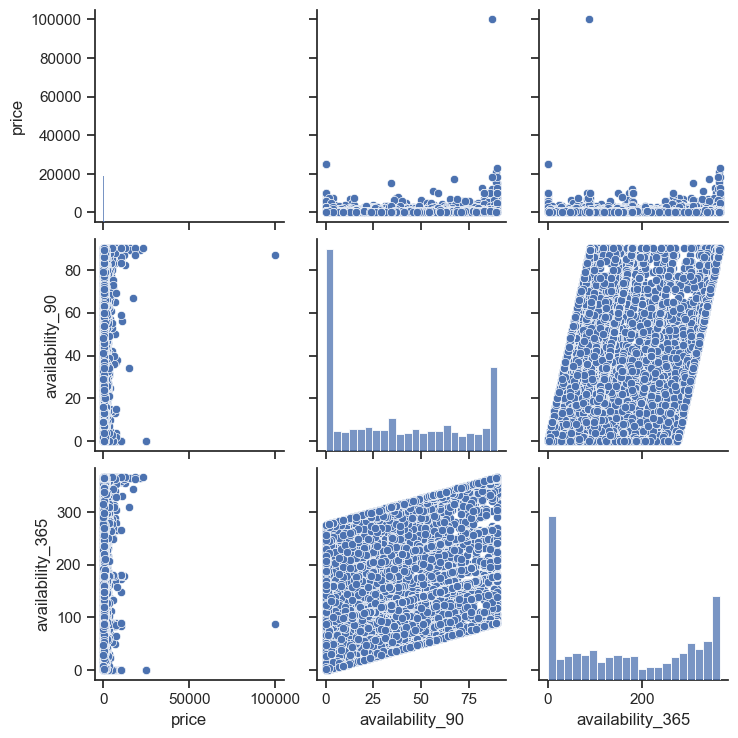

In [79]:
# ecplore pairwise on selected features
selected_pairwise = ['price', 'availability_90', 'availability_365'] 

sns.pairplot(cleandata[selected_pairwise]);

<AxesSubplot:>

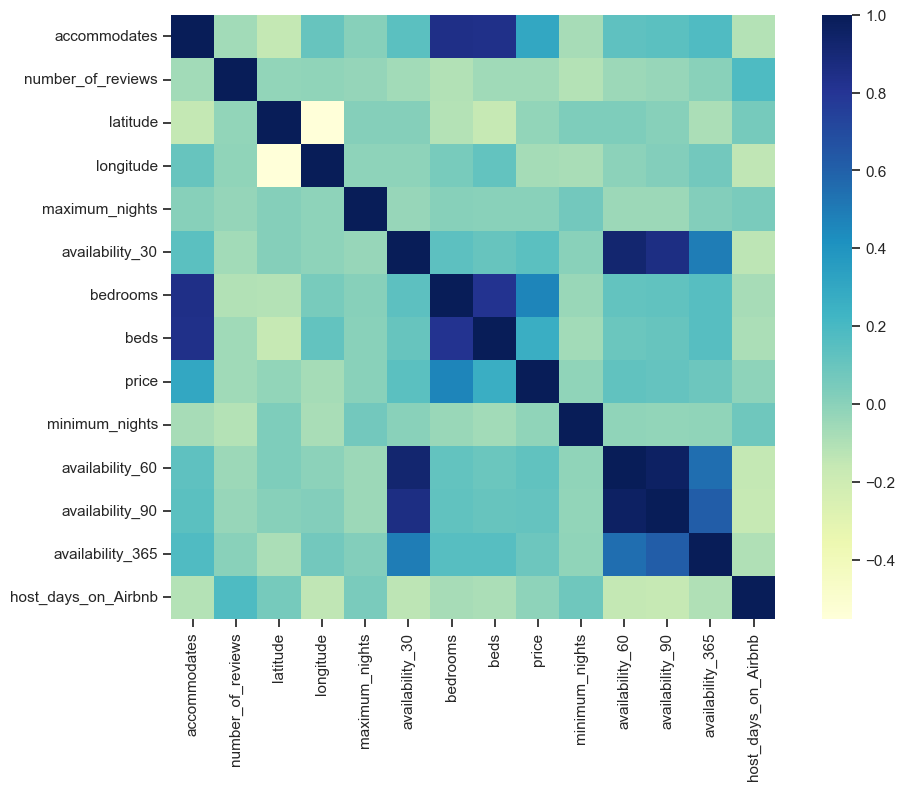

In [80]:
# explore correlations among features
# strong positive correlation between availability_60 and availability_90
cleandata_correlation = cleandata.corr()
sns.heatmap(cleandata_correlation,  square=True,cmap="YlGnBu")

In [81]:
# drop avaliability 30days and 60days
cleandata = cleandata.drop(columns=['availability_60','availability_30'])

C:\Users\thuan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\thuan\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

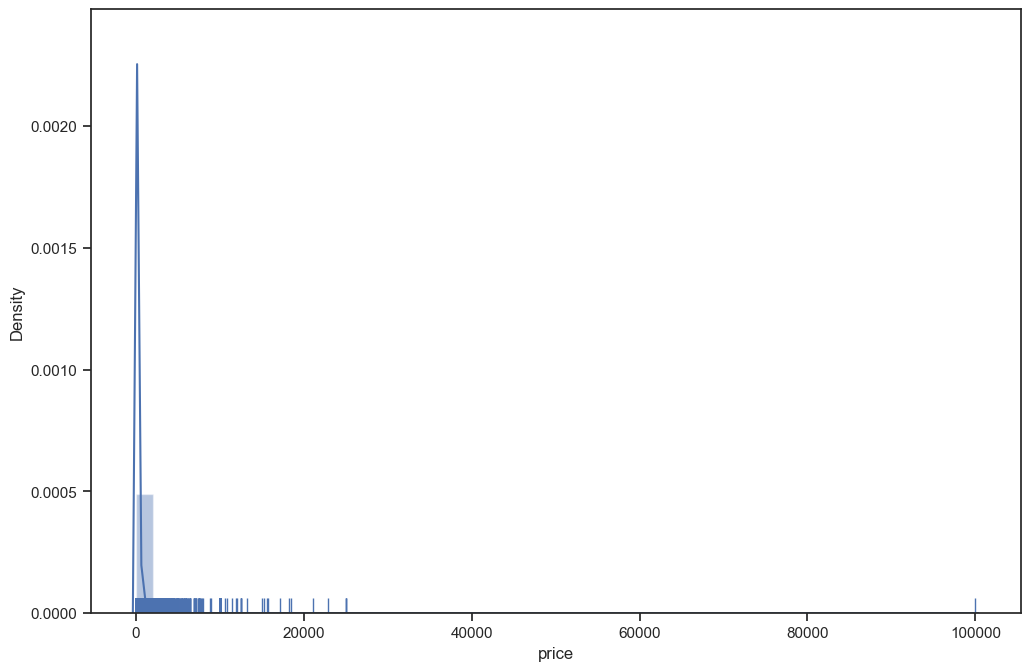

In [82]:
# explore the distribution of prices
# price distribution is right skewed
sns.distplot(cleandata.price,rug=True)

C:\Users\thuan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\thuan\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='logprice', ylabel='Density'>

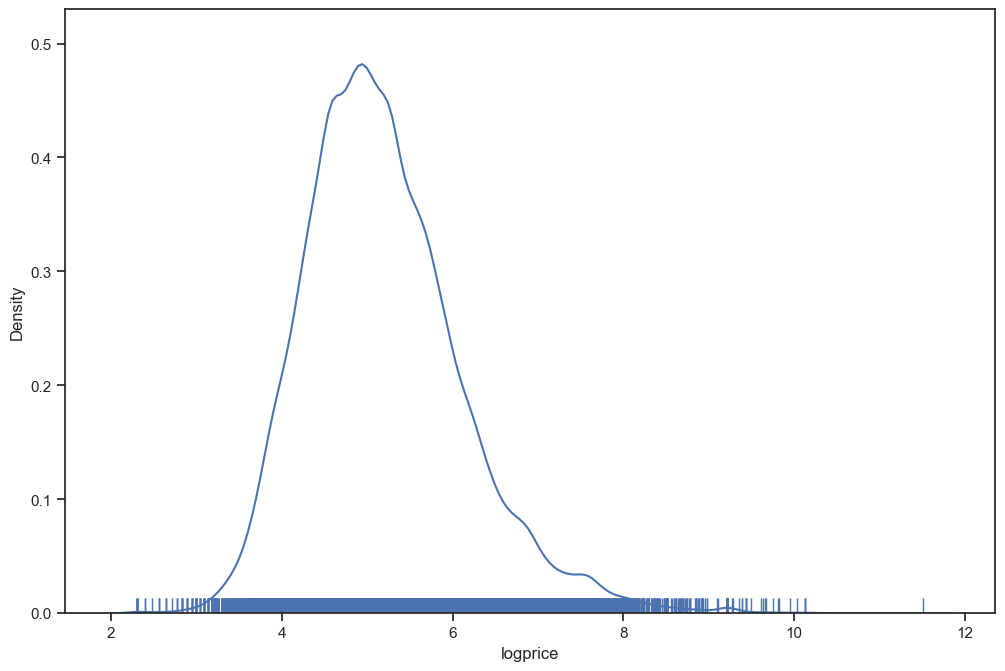

In [83]:
# notable records with price equal to zero
# price equal to zero is unattainable, so select rows with prices greater than zero
# explore log price to correct skewness for linear regression

mask = cleandata.price > 0
cleandata['logprice'] = np.log(cleandata[mask].price).round(4)
sns.distplot(cleandata['logprice'], hist=False, rug=True)

## D. [Analysis, visualize and Modelling](analysisandmodelling) ##
    1. Answers to research/analysis question(s)

### Visualize ###
    * Question I:
       - Where are the Airbnb rooms in Los Angeles City?
          +  Analyzing the distribution of Airbnb listing in the 3 boroughs of LAC.

**To address this question I, we have constructed a bar graph showing the distribution of Airbnb listing in the 3 boroughs of LAC** 

In [84]:
# Get listing percentage for each Los Angeles Borough
# Analyzing the distribution of Airbnb listing in the 3 boroughs of LAC.
ddf = cleandata["Borough"].value_counts(normalize=True) * 100
ddf2 = cleandata["Borough"].value_counts() 
print("\n\n\n\nlisting each Borough Percentages :", ddf, "\n\n\n\nlisting each Borough Raw counts" , ddf2, sep="\n" )





listing each Borough Percentages :
City of Los Angeles     51.801182
Other Cities            38.663147
Unincorporated Areas     9.535670
Name: Borough, dtype: float64




listing each Borough Raw counts
City of Los Angeles     13934
Other Cities            10400
Unincorporated Areas     2565
Name: Borough, dtype: int64


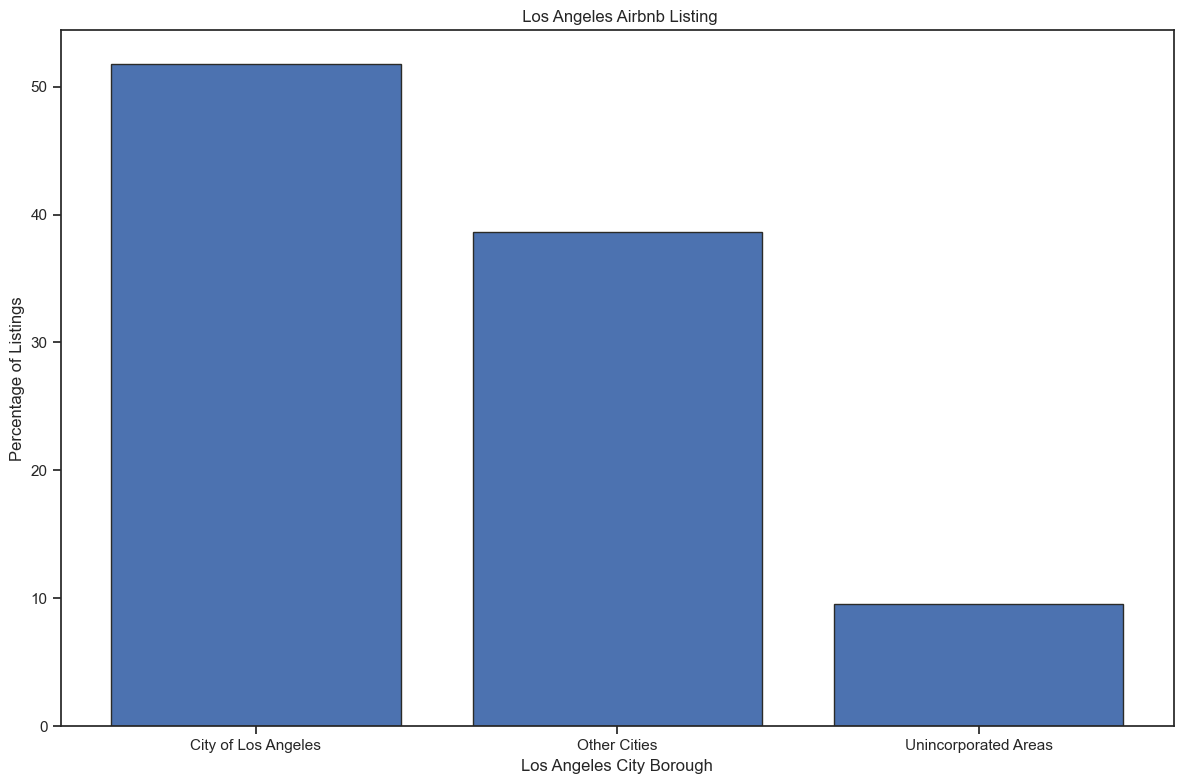

In [85]:
# Plot the Airbnb listing in Los Angeles
plt.bar( ddf.index, ddf.values,  edgecolor="#2b2b28")
plt.xlabel("Los Angeles City Borough")
plt.ylabel("Percentage of Listings")
plt.title("  Los Angeles Airbnb Listing ")
plt.tight_layout()
plt.show()

**To address this question I, we have constructed a bar graph showing the distribution of room type in the 3 boroughs of LAC**

In [86]:
# # get the room types percentages
roomtypes = cleandata["room_type"].value_counts(normalize=True) * 100
roomtypes2 = cleandata["room_type"].value_counts()
print("\n\n\n\nRoomtypes Percentages :", roomtypes, "\n\n\n\nRaw counts" , roomtypes2 , sep="\n")





Roomtypes Percentages :
Entire home/apt    74.243607
Private room       24.229556
Shared room         1.336372
Hotel room          0.190464
Name: room_type, dtype: float64




Raw counts
Entire home/apt    23778
Private room        7760
Shared room          428
Hotel room            61
Name: room_type, dtype: int64


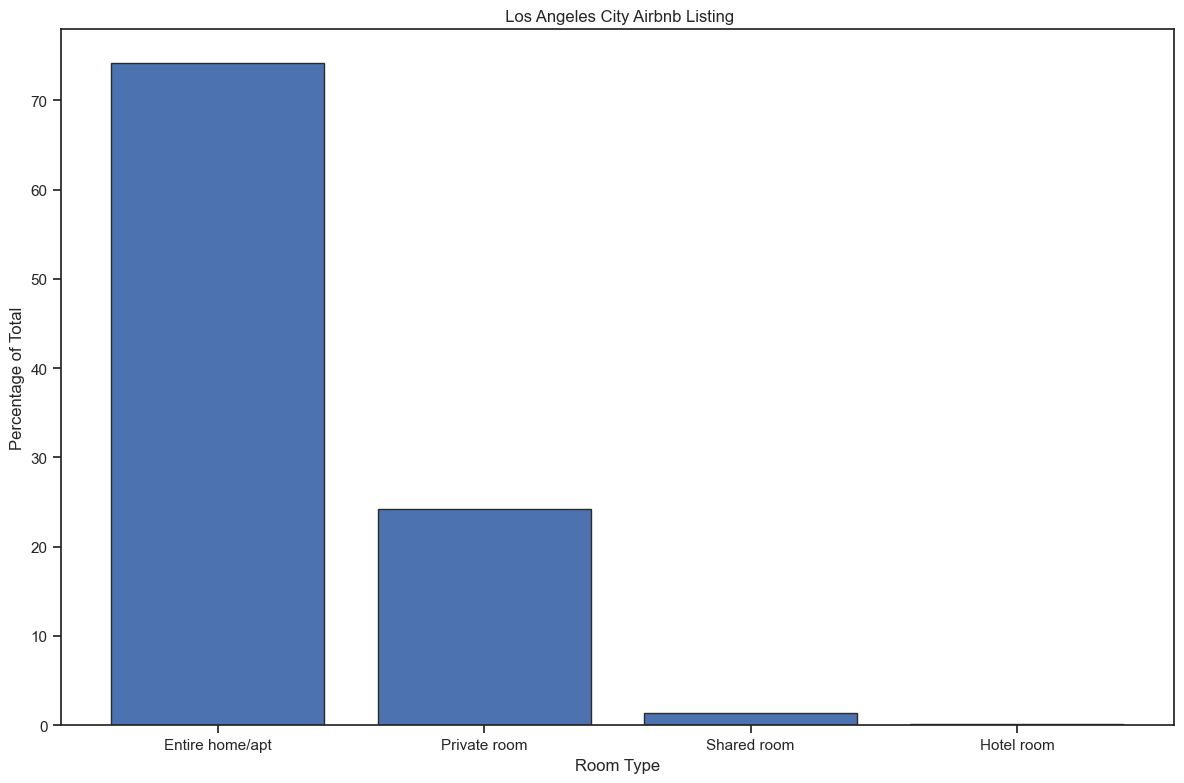

In [87]:
# # # plot the room types
plt.bar(roomtypes.index, roomtypes.values, edgecolor="#2b2b28")
plt.xlabel("Room Type")
plt.ylabel("Percentage of Total")
plt.title("  Los Angeles City Airbnb Listing ")
plt.tight_layout()
plt.show()

#### Conclution ####
- There are three neighborhoods — Boroughs — in Los Angeles City. It is very difficult to know the exact boundaries of each borough but one thing to know is that City of Los Angeles. As shown by the chart above, 51.8% (13,934) of Los Angeles City Airbnb listings are in City of Los Angeles, followed by Other Cities with 38.66% (10,400), Unincorporated Areas 9.54% (2,565).

- There are four room types listed on Los Angeles City Airbnb: Entire home/apartment, Private room, Shared room, and Hotel room. The majority of the rooms are Entire home/apartment (74.2436%) and Private rooms (24.2296%). Entire home/apartment and Private rooms make amazingly 98.4732% of the entire Los Angles City Airbnb listing.

- Shared rooms made up 1.3364% (428) of the listings in Los Angeles City. Undoubtedly most travelers, tourists, and visitors to Los Angeles City would prefer Entire home/apartment and Private rooms to Shared rooms. Understandably, less than 0.1905% (61) of the listings are Hotel rooms.

### Visualize ###
    * Question II:
       - Where is the most affordable best Airbnb rooms in Los Angeles using average price in each borough.
          +  Analyzing the distribution of Airbnb average prices in the 3 boroughs of LAC.

**To address this question II, we have constructed a bar graph showing the distribution of listings room_types within the boroughs of LAC**

Đây là chiến lược mà tôi có để điền vào từng cột:
- room_type have caterory data type. I will change this later but for now i want to fill the missing values. The missing values here most probably mean they are equal to zero, so i will them with zero

In [88]:
# # get the counts of room_types per bourough
hh = pd.crosstab(cleandata["Borough"], cleandata["room_type"], normalize="index", margins = True).fillna(0) * 100
hh2 = pd.crosstab(cleandata["Borough"], cleandata["room_type"],  margins = True).fillna(0)
hht = pd.crosstab(cleandata["Borough"], cleandata["room_type"], normalize="all").fillna(0) * 100
print("\n\n\n\nroom_types per bourough Percentages :", hh, " \n\n\n\nroom_types per bourough Raw counts" , hh2,
        " \n\n\n\nroom_types per bourough Raw counts", hht , sep="\n")





room_types per bourough Percentages :
room_type             Entire home/apt  Hotel room  Private room  Shared room
Borough                                                                     
City of Los Angeles         76.603990    0.186594     21.307593     1.901823
Other Cities                69.259615    0.163462     29.423077     1.153846
Unincorporated Areas        69.668616    0.000000     29.317739     1.013645
All                         73.103089    0.159857     25.209116     1.527938
 



room_types per bourough Raw counts
room_type             Entire home/apt  Hotel room  Private room  Shared room  \
Borough                                                                        
City of Los Angeles             10674          26          2969          265   
Other Cities                     7203          17          3060          120   
Unincorporated Areas             1787           0           752           26   
All                             19664          43       

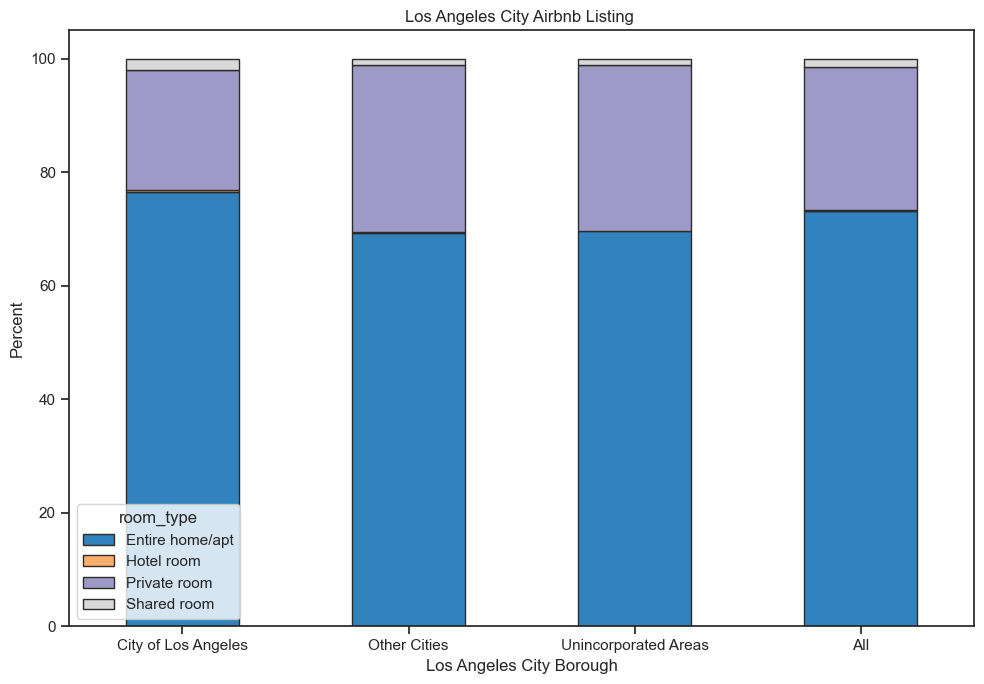

In [89]:
# # Plot the distribution of listings room_types within the boroughs
hh.plot.bar(stacked=True, cmap='tab20c', figsize=(10,7), edgecolor="#2b2b28")
plt.xticks(rotation=0)
plt.xlabel("Los Angeles City Borough")
plt.ylabel("Percent")
plt.title("Los Angeles City Airbnb Listing ")
plt.tight_layout()
plt.show()

**To address this question II, we have constructed a bar graph showing the distribution of listings room_types across the boroughs of LAC**

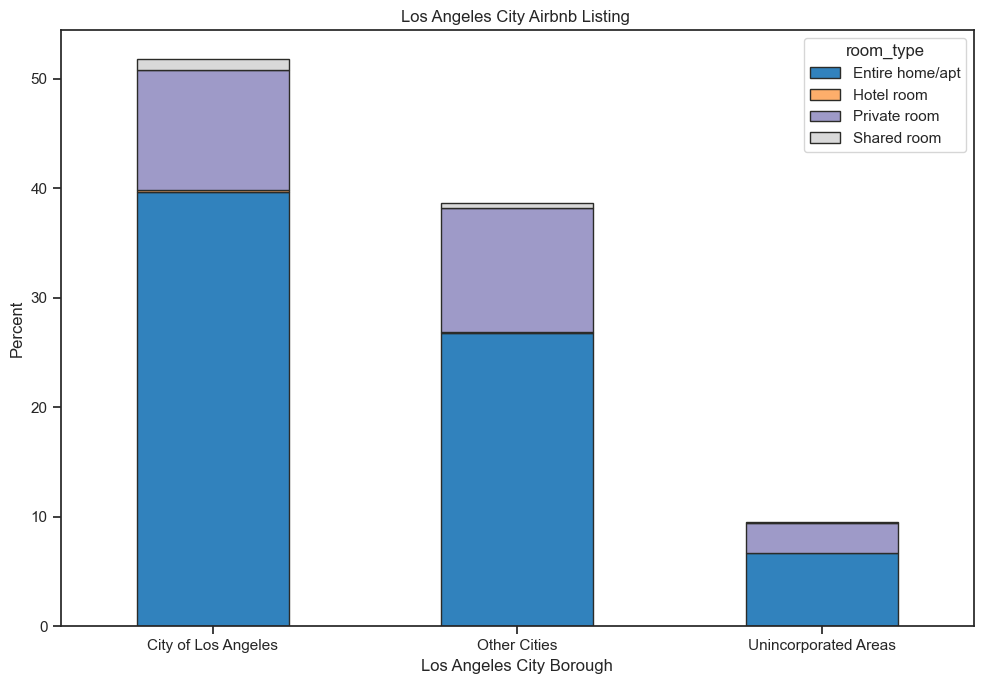

In [90]:
# Plot the distribution of listings room_types across the boroughs
hht.plot.bar(stacked=True, cmap='tab20c', figsize=(10,7), edgecolor="#2b2b28")
plt.xticks(rotation=0)
plt.xlabel("Los Angeles City Borough")
plt.ylabel("Percent")
plt.title("Los Angeles City Airbnb Listing ")
plt.tight_layout()
plt.show()

#### Conclution ####
- Taking a closer look at each borough as shown on the chart above, we see the same distribution of room types within the boroughs. Entire room/apartment and Private room made up the majority of the listings within the boroughs. There are no Hotel rooms in Unincorporated Areas. Again, the majority of the listings are in City of Los Angeles and Other Cities.

### Visualize ###
    * Question III:
       - What is the most popular and affordable Airbnb rooms in each Los Angeles borough
          + Finding the average prices of Airbnb rooms according to room types in each LAC borough.
          

**To address this question III, we have constructed a bar graph showing the Average price of listing in each Borough**

In [91]:
# find average price of listing in each borough
ave_price = cleandata.groupby("Borough", as_index=False).agg({'price': 'mean'})
print("average price of listing in each borough :", ave_price, sep="\n")

average price of listing in each borough :
                Borough       price
0   City of Los Angeles  298.127745
1          Other Cities  340.141154
2  Unincorporated Areas  276.741131


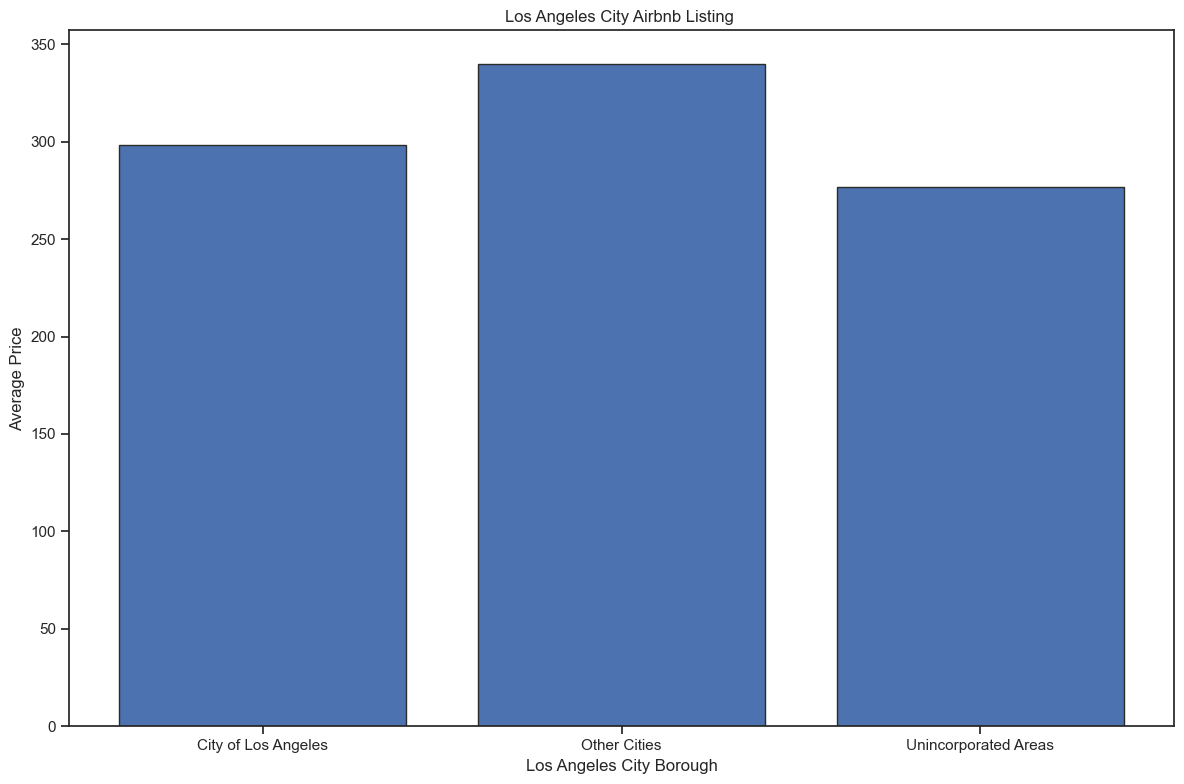

In [92]:
# plot the Average price of listing in each Borough
plt.bar(ave_price.Borough, ave_price.price, edgecolor="#2b2b28")
plt.xlabel("Los Angeles City Borough")
plt.ylabel("Average Price")
plt.title("Los Angeles City Airbnb Listing ")
plt.tight_layout()
plt.show()

**To address this question III, we have constructed a bar graph showing the average price per room type in each Borough**

In [93]:
# # Average price per room type in each Borough
nprice_room = cleandata.groupby(["Borough", "room_type"], as_index=False, observed=True).agg({'price': 'mean'})
price_room = nprice_room.pivot(index = 'Borough', columns = "room_type", values = "price")
print("\n\n\nAverage price per room type in each Borough :", nprice_room, 
       "\n\n\nAverage price per room type in each Borough: Pivot" , price_room , sep="\n")




Average price per room type in each Borough :
                 Borough        room_type        price
0    City of Los Angeles     Private room   117.880431
1    City of Los Angeles  Entire home/apt   351.136875
2    City of Los Angeles      Shared room    92.256604
3    City of Los Angeles       Hotel room  1217.000000
4           Other Cities     Private room   162.301961
5           Other Cities  Entire home/apt   420.156324
6           Other Cities      Shared room    92.308333
7           Other Cities       Hotel room   197.705882
8   Unincorporated Areas     Private room    96.401596
9   Unincorporated Areas  Entire home/apt   355.853945
10  Unincorporated Areas      Shared room    55.230769



Average price per room type in each Borough: Pivot
room_type             Entire home/apt   Hotel room  Private room  Shared room
Borough                                                                      
City of Los Angeles        351.136875  1217.000000    117.880431    92.256604
Oth

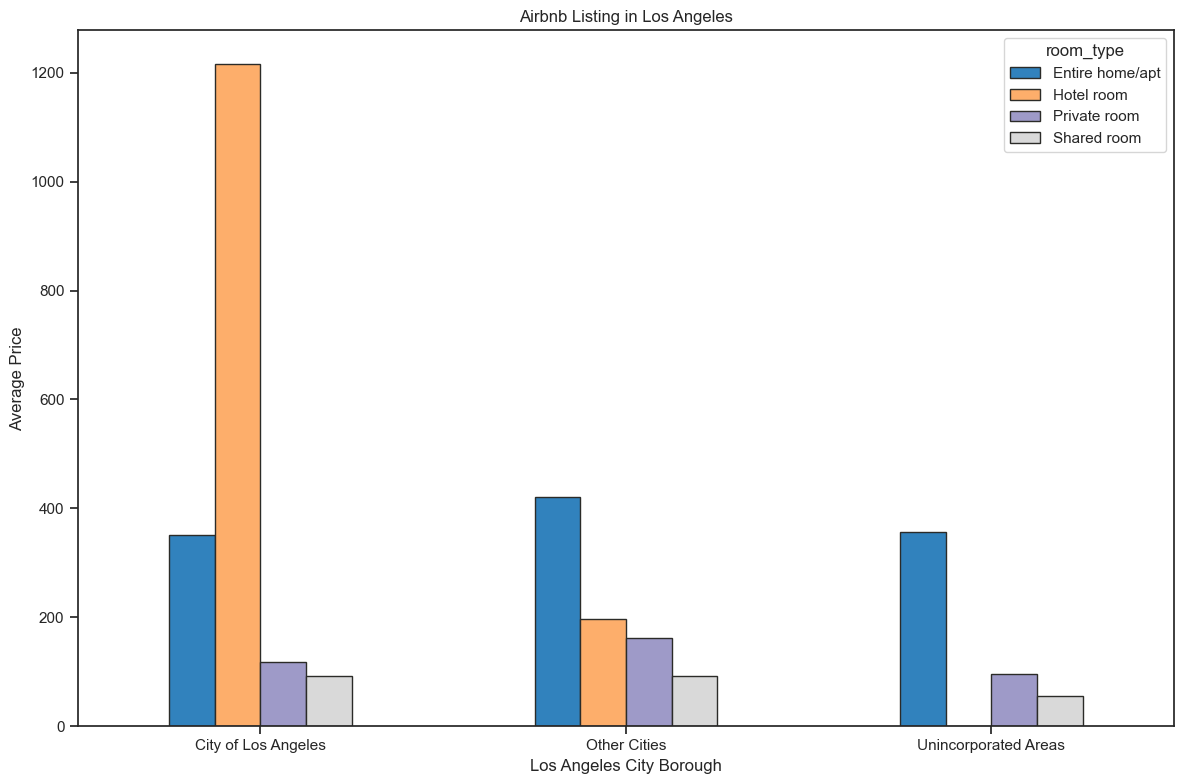

In [94]:
# plot the average price within each borough
price_room.plot.bar(rot=0, cmap='tab20c', edgecolor="#2b2b28")
plt.xlabel("Los Angeles City Borough")
plt.ylabel("Average Price")
plt.title("Airbnb Listing in Los Angeles")
plt.tight_layout()
plt.show()

#### Conclution ####
- How affordable are Los Angeles Airbnb listings? To answer this question, we will use the average listing prices. The average price of Airbnb listing in City of Los Angeles is `$`298.127745, Other Cities is `$`340.141154, Unincorporated Areas `$`276.741131. Arguably, there seems to be some correlation between price and distance from the city center.

- Within Los Angeles City boroughs, Share rooms are amazingly cheap in Unincorporated Areas (`$`55.23). Apart from hotel rooms in City of Los Angeles, the Entire home/apartments are the most expensive listings in Las Angeles City boroughs. Private rooms seem to be the most affordable room type across the boroughs especially in Unincorporated Areas (`$`96.4), and City of Los Angeles (`$`117.88). Prices of private rooms are `$`162.3 in Other Cities.

### Modelling ###
    * Question IV:
       - What are the major determinants of prices of rooms in Los Angeles Airbnb 
          + Finding factors that positively and negatively impact the price of Airbnb rooms in LAC using linear regression analysis.

In [95]:
# prepare dataset for analysis
cleandata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32027 entries, 0 to 42036
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   host_is_superhost       32004 non-null  category
 1   host_has_profile_pic    32004 non-null  category
 2   host_identity_verified  32004 non-null  category
 3   accommodates            32027 non-null  int64   
 4   number_of_reviews       32027 non-null  int64   
 5   latitude                32027 non-null  float64 
 6   longitude               32027 non-null  float64 
 7   room_type               32027 non-null  category
 8   maximum_nights          32027 non-null  int64   
 9   bedrooms                29233 non-null  float64 
 10  beds                    31427 non-null  float64 
 11  price                   32027 non-null  float64 
 12  minimum_nights          32027 non-null  int64   
 13  availability_90         32027 non-null  int64   
 14  availability_365      

In [96]:
def preanalysis(datat):
    """The 'preanalysis' function replaces or drop missing, NAN or Na and
        get dummies from categorical features.
 
    Args: 
        'data1' (DataFrame): the DataFrame for data wrangling

 
    Returns: 
        DataFrame: The DataFrame for analysis
 
    """
    # replace nans with zero
    data = datat.copy()
#     data[['security_deposit','cleaning_fee']] = data[['security_deposit','cleaning_fee']].fillna(value=0)
    data = data.dropna()

    dff = pd.get_dummies(data, prefix_sep="_")

    return dff

In [97]:
# prepare data for analysis
analysis_data = preanalysis(cleandata) 
print(analysis_data.info(), analysis_data.shape, sep="\n\n")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23839 entries, 0 to 42009
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   accommodates                  23839 non-null  int64  
 1   number_of_reviews             23839 non-null  int64  
 2   latitude                      23839 non-null  float64
 3   longitude                     23839 non-null  float64
 4   maximum_nights                23839 non-null  int64  
 5   bedrooms                      23839 non-null  float64
 6   beds                          23839 non-null  float64
 7   price                         23839 non-null  float64
 8   minimum_nights                23839 non-null  int64  
 9   availability_90               23839 non-null  int64  
 10  availability_365              23839 non-null  int64  
 11  host_days_on_Airbnb           23839 non-null  float64
 12  logprice                      23839 non-null  float64
 13  h

In [98]:
# split data for analysis and validation
analysis_data.dropna()
target = analysis_data.pop("logprice")
analysis_data.drop(columns=["price"], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(analysis_data, target, test_size=0.2)

In [99]:
# explore the split data
print(X_train.head(), X_test.head(), y_train.head(), y_test.head(), sep="\n", end="\n\n")
print(X_train.shape,  y_train.shape, X_test.shape, y_test.shape, sep="\n")

       accommodates  number_of_reviews  latitude  longitude  maximum_nights  \
3296              2                  2  34.22996 -118.23995            1125   
30043             2                  8  34.11356 -118.28385              62   
3959              5                 77  34.05599 -118.30170              31   
20573            14                  3  34.10104 -118.36083            1125   
3774              1                  0  34.04762 -118.46497            1125   

       bedrooms  beds  minimum_nights  availability_90  availability_365  ...  \
3296        1.0   1.0               1                0                 0  ...   
30043       1.0   1.0              30               16                16  ...   
3959        1.0   3.0              30               90               365  ...   
20573       5.0   6.0              30               57               332  ...   
3774        1.0   1.0              30                0                 0  ...   

       host_identity_verified_t  room_

In [100]:
# construct the data analysis pipeline
pl = Pipeline([
              ("scaler", StandardScaler()),
              ("radomForest", RandomForestRegressor(n_estimators = 200, n_jobs = -1,
                           oob_score = True, bootstrap = True))
            ])

In [101]:
# fit and evaluate the model
pl.fit(X_train, y_train)
pred = pl.predict(X_test)

print("mean_absolute_error : ", mean_absolute_error(y_test, pred))
print("mean_squared_error: ", mean_squared_error(y_test, pred))
print("Root mean_squared_error: ", np.sqrt(mean_squared_error(y_test, pred)))
print("R_squared : ", pl.score(X_test, y_test))
print("R2_squared : ", r2_score(pred, y_test))

mean_absolute_error :  0.34447675230704694
mean_squared_error:  0.23799988357985147
Root mean_squared_error:  0.4878523173869849
R_squared :  0.7343648732042436
R2_squared :  0.6341613897699956


In [102]:
# fit and evaluate complex models

estimatorstack = [
    ('Random Forest', RandomForestRegressor(random_state=342)),
    ('Lasso', LassoCV())
        ]


stacking_regressor = StackingRegressor(
    estimators=estimatorstack, final_estimator=RidgeCV())


estimators = [('OLS', LinearRegression()),
              ('Theil-Sen', TheilSenRegressor(random_state=682)),
              ('RANSAC', RANSACRegressor(random_state=9052)),
              ('HuberRegressor', HuberRegressor()),
              ("decisionTree", DecisionTreeRegressor()),
              ("radomForest", RandomForestRegressor(n_estimators = 200,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 3452)), 
            ('Stacked Regressors', stacking_regressor),
            ("MLregs", MLPRegressor(hidden_layer_sizes=(100,100),
                                    tol=1e-2, max_iter=5000, random_state=670))
            ]

for name, estimator in estimators:
    model = make_pipeline(StandardScaler(), estimator)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(name," mean_absolute_error : ", mean_absolute_error(y_test, pred))
    print(name," mean_squared_error: ", mean_squared_error(y_test, pred))
    print(name," Root mean_squared_error: ", np.sqrt(mean_squared_error(y_test, pred)))
    print(name," R2_squared : ", r2_score(pred, y_test))
    print(name," R_squared : ", model.score(X_test, y_test), end="\n\n")



OLS  mean_absolute_error :  0.41012604157484506
OLS  mean_squared_error:  0.3208786309384929
OLS  Root mean_squared_error:  0.5664614999613768
OLS  R2_squared :  0.42435637125085046
OLS  R_squared :  0.641862699538685

Theil-Sen  mean_absolute_error :  0.5236663027340636
Theil-Sen  mean_squared_error:  1.110520531870723
Theil-Sen  Root mean_squared_error:  1.05381237982419
Theil-Sen  R2_squared :  0.2528834371529215
Theil-Sen  R_squared :  -0.2394680949236554

RANSAC  mean_absolute_error :  0.45174925382174014
RANSAC  mean_squared_error:  0.5557701587501217
RANSAC  Root mean_squared_error:  0.7454999387995426
RANSAC  R2_squared :  0.2944071539084866
RANSAC  R_squared :  0.3796968537618882

HuberRegressor  mean_absolute_error :  0.40462694308356556
HuberRegressor  mean_squared_error:  0.3246376595830401
HuberRegressor  Root mean_squared_error:  0.569769830355241
HuberRegressor  R2_squared :  0.43254805714403255
HuberRegressor  R_squared :  0.6376671930720268

decisionTree  mean_absolute

In [103]:
# fit more models
# Training classifiers
# RandomForestRegressor outperformed even the complex models
gbr = GradientBoostingRegressor(n_estimators=200)
rfr = RandomForestRegressor(n_estimators=200)
lreg = LinearRegression()
vreg = VotingRegressor([('lr', lreg), ('gb', gbr), ('rf', rfr)])

estimators2 = [
    ("GradientBoostingRegressor", gbr),
    ("RandomForestRegressor", rfr),
    ("LinearRegression", lreg),
    ("VotingRegressor", vreg)
]

for name, estimator in estimators2:
    model = make_pipeline(StandardScaler(), estimator)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(name," mean_absolute_error : ", mean_absolute_error(y_test, pred))
    print(name," mean_squared_error: ", mean_squared_error(y_test, pred))
    print(name," Root mean_squared_error: ", np.sqrt(mean_squared_error(y_test, pred)))
    print(name," R2_squared : ", r2_score(pred, y_test))
    print(name," R_squared : ", model.score(X_test, y_test), end="\n\n")

GradientBoostingRegressor  mean_absolute_error :  0.34502515510755544
GradientBoostingRegressor  mean_squared_error:  0.23458028424220295
GradientBoostingRegressor  Root mean_squared_error:  0.4843348885246684
GradientBoostingRegressor  R2_squared :  0.6291225046512935
GradientBoostingRegressor  R_squared :  0.7381815376915697

RandomForestRegressor  mean_absolute_error :  0.3429809078229865
RandomForestRegressor  mean_squared_error:  0.23689488601336883
RandomForestRegressor  Root mean_squared_error:  0.48671848743741886
RandomForestRegressor  R2_squared :  0.6355408199393515
RandomForestRegressor  R_squared :  0.7355981770372817

LinearRegression  mean_absolute_error :  0.41012604157484506
LinearRegression  mean_squared_error:  0.3208786309384929
LinearRegression  Root mean_squared_error:  0.5664614999613768
LinearRegression  R2_squared :  0.42435637125085046
LinearRegression  R_squared :  0.641862699538685

VotingRegressor  mean_absolute_error :  0.3471369478102913
VotingRegressor  

In [104]:
# Gridsearch for model, and hyperparameter tuning

pipe = Pipeline([
              ("scaler", StandardScaler()),
              ("model", RandomForestRegressor())
            ])

grid_ = [{"model": [XGBRegressor()],
            "model__colsample_bytree": [0.8, 0.9],
            "model__max_depth": [4, 6],
            "model__n_estimators": [90, 100]},
        {"model": [GradientBoostingRegressor()],
        'model__learning_rate': [0.1, 0.01], 
        'model__max_features': [1.0, 0.5], 
        'model__n_estimators': [100, 150]},
        {"model": [RandomForestRegressor()],
            "model__ccp_alpha":  np.arange(0.0, 0.4, 0.05),
            "model__max_depth": [4, 6],
            "model__n_estimators": [90, 100, 150]

}]

gridsearcher = GridSearchCV(estimator=pipe, param_grid=grid_,
                       cv=5, verbose=1, n_jobs=-1)


best_model = gridsearcher.fit(X_train, y_train)

# # View best model
best_model.best_estimator_.get_params()['model']


Fitting 5 folds for each of 64 candidates, totalling 320 fits


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=90, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [105]:
# let get the feature importance
def dfform(lstt):
    """The dfform function form pandas dataframe from list
 
    Args: 
        lstt (list, series): the list or series to used in forming dataFrame

 
    Returns: 
        DataFrame: The DataFrame for analysis
 
    """
    df = pd.DataFrame(list(zip(X_test.columns, lstt)), columns=["features", "coefficients"])
    df3 = df.sort_values(by="coefficients", ascending=False).reset_index(drop=True)
#     df3.reset_index(drop=True,inplace=True)

    return df3

features_weight = dfform(pl[-1].feature_importances_)
features_weight.head()

,features,coefficients
0,bedrooms,0.491004
1,longitude,0.110517
2,latitude,0.085059
3,room_type_Entire home/apt,0.058163
4,availability_90,0.043628


### Visualize ###

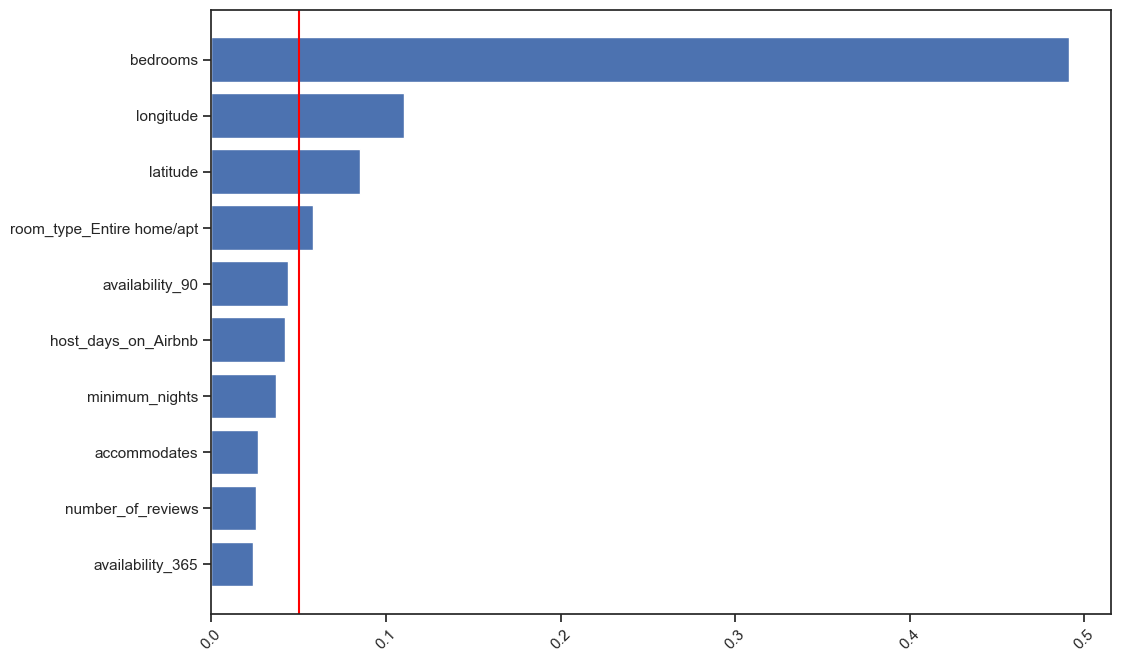

In [106]:
# visualize the top 10 important feature affecting prices
top10 = features_weight[:10].sort_values(by="coefficients")
plt.barh(top10.features, top10.coefficients)
plt.xticks(rotation=45)
plt.axvline(x=0.05, color='red', linestyle='-')
plt.gcf().subplots_adjust(left=0.15)
plt.show()

In [107]:
# construct the data analysis pipeline
xgbpipe = Pipeline([
              ("scaler", StandardScaler()),
              ("XGBRegressor", best_model.best_estimator_.get_params()['model'])
            ])

xgbpipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGBRegressor',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=0.8, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=90, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                    

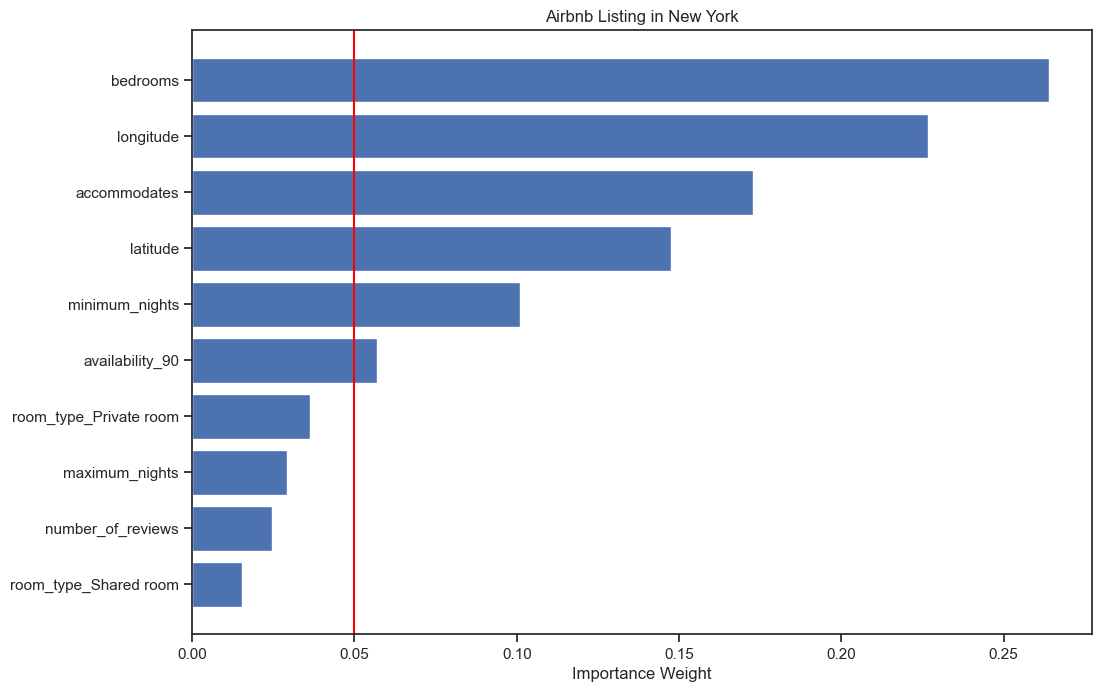

In [108]:
# visualize the top 10 important feature affecting prices using eli5 permutation
perm = PermutationImportance(xgbpipe).fit(X_test, y_test)

_imp_eli5 = dfform(perm.feature_importances_)

eli5_top10 = _imp_eli5.head(10).sort_values(by="coefficients")
plt.barh(eli5_top10.features, eli5_top10.coefficients)
plt.axvline(x=0.05, color='red', linestyle='-')
plt.xlabel("Importance Weight")
plt.title("Airbnb Listing in New York")
plt.gcf().subplots_adjust(left=0.15)
plt.savefig("plot.jpeg")
plt.show()

#### Conclution #### 
- It is clear that important price determinants of Airbnb listing in Los Angeles City are number of bedroom, longitude, accommodates, latitude, minimum nights, 90 days availability, room type private room, number of reviews, beds and room type entire home or apartment. Generally, the location and number of bedroom in the room are major determinants of prices.